In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp -r /content/drive/MyDrive/College/Thesis/RDD/RDD2020_yolo_data.tar.gz ./

In [3]:
!tar -xzvf RDD2020_yolo_data.tar.gz

Streaming output truncated to the last 5000 lines.
content/data/labels/train/Japan_007836.txt
content/data/labels/train/Japan_007837.txt
content/data/labels/train/Japan_007840.txt
content/data/labels/train/Japan_007841.txt
content/data/labels/train/Japan_007843.txt
content/data/labels/train/Japan_007844.txt
content/data/labels/train/Japan_007845.txt
content/data/labels/train/Japan_007849.txt
content/data/labels/train/Japan_007850.txt
content/data/labels/train/Japan_007852.txt
content/data/labels/train/Japan_007853.txt
content/data/labels/train/Japan_007855.txt
content/data/labels/train/Japan_007856.txt
content/data/labels/train/Japan_007857.txt
content/data/labels/train/Japan_007859.txt
content/data/labels/train/Japan_007861.txt
content/data/labels/train/Japan_007863.txt
content/data/labels/train/Japan_007868.txt
content/data/labels/train/Japan_007871.txt
content/data/labels/train/Japan_007872.txt
content/data/labels/train/Japan_007873.txt
content/data/labels/train/Japan_007875.txt
con

In [1]:
!pip install -q -U albumentations
!echo "$(pip freeze | grep albumentations) is successfully installed"

albumentations==1.1.0 is successfully installed


In [2]:
!pip uninstall opencv-python-headless

Found existing installation: opencv-python-headless 4.1.2.30
Uninstalling opencv-python-headless-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.1.2.30.dist-info/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libQtCore-bbdab771.so.4.8.7
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libQtGui-903938cd.so.4.8.7
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libQtTest-1183da5d.so.4.8.7
Proceed (y/n)? n


In [18]:
!pip install opencv-python-headless==4.1.2.30

     |████████████████████████████████| 21.8 MB 76.0 MB/s 


In [ ]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)
!pip install pylabel > /dev/null

In [ ]:
from pylabel import importer

In [ ]:
path_to_annotations = "/content/content/data/labels/valid"

#Identify the path to get from the annotations to the images 
path_to_images = "/content/content/data/images/valid"

#Import the dataset into the pylable schema 
#Class names are defined here https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml
yoloclasses = ['D00', 'D10', 'D20', 'D40']
dataset = importer.ImportYoloV5(path=path_to_annotations, path_to_images=path_to_images, cat_names=yoloclasses,
    img_ext="jpg", name="Rdd2020")

dataset.df.head(5)

img_folder      img_filename  ... split  annotated
id                                                        ...                 
0   /content/content/data/images/valid  Japan_006877.jpg  ...                1
1   /content/content/data/images/valid  Japan_006877.jpg  ...                1
2   /content/content/data/images/valid  Japan_006877.jpg  ...                1
3   /content/content/data/images/valid  Japan_007502.jpg  ...                1
4   /content/content/data/images/valid  Japan_007502.jpg  ...                1

[5 rows x 25 columns]

In [ ]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")

Number of images: 2439
Number of classes: 4
Classes:['D00', 'D10', 'D20', 'D40']
Class counts:
D20    1596
D00    1318
D10    1095
D40    1038
Name: cat_name, dtype: int64


In [ ]:
from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(100))
display(dataset.visualize.ShowBoundingBoxes(99))
display(dataset.visualize.ShowBoundingBoxes(85))
display(dataset.visualize.ShowBoundingBoxes(45))
display(dataset.visualize.ShowBoundingBoxes(13))
display(dataset.visualize.ShowBoundingBoxes(7))


Output hidden; open in https://colab.research.google.com to view.

In [3]:
%matplotlib inline

In [4]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [5]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_coco_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img

def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, x_max, y_max  = bbox
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img

def visualize_yolo_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    #x_center, y_center, width, height  = bbox
    x_min, x_max, y_min, y_max = map(int, yolo2bbox(bbox))
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img

def visualize_yolo(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
      print(category_id)
      class_name = category_id_to_name[category_id]
      img = visualize_yolo_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
      print(category_id)
      class_name = category_id_to_name[category_id]
      img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [6]:
#https://debuggercafe.com/bounding-box-augmentation-for-object-detection-using-albumentations/
def yolo2bbox(bboxes):
    """
    Function to convert bounding boxes in YOLO format to 
    xmin, ymin, xmax, ymax.
    
    Parmaeters:
    :param bboxes: Normalized [x_center, y_center, width, height] list
    return: Normalized xmin, ymin, xmax, ymax
    """
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [ ]:
dataset.export.ExportToCoco(cat_id_index=1)

['/content/content/data/labels/valid/Rdd2020.json']

Load Image from disk

In [7]:
image = cv2.imread('content/data/images/valid/Czech_000006.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [77]:
def get_bounding_boxes(filename):
  bboxes = []
  category_ids = []
  with open(filename, 'rt') as fd:
    for line in fd.readlines():
      bbox_temp = []
      splitted = line.split()
      category_ids.append(int(splitted[0]))
      bbox_temp.append(float(splitted[1]))
      bbox_temp.append(float(splitted[2]))
      bbox_temp.append(float(splitted[3]))
      bbox_temp.append(float(splitted[4]))
      bboxes.append(bbox_temp)
  return bboxes, category_ids


In [80]:
import cv2
def draw_boxes(image, bboxes, category_ids, category_id_to_name, format='coco'):
    """
    Function accepts an image and bboxes list and returns
    the image with bounding boxes drawn on it.
    Parameters
    :param image: Image, type NumPy array.
    :param bboxes: Bounding box in Python list format.
    :param format: One of 'coco', 'voc', 'yolo' depending on which final
        bounding noxes are formated.
    Return
    image: Image with bounding boxes drawn on it.
    box_areas: list containing the areas of bounding boxes.
    """
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    box_areas = []
    if format == 'coco':
        # coco has bboxes in xmin, ymin, width, height format
        # we need to add xmin and width to get xmax and...
        # ... ymin and height to get ymax
        for box_num, box in enumerate(bboxes):
            xmin = int(box[0])
            ymin = int(box[1])
            xmax = int(box[0])+int(box[2])
            ymax = int(box[1])+int(box[3])
            width = int(box[2])
            height = int(box[3])
            cv2.rectangle(
                image, 
                (xmin, ymin), (xmax, ymax),
                color=(0, 0, 255),
                thickness=2
            )
            box_areas.append(width*height)
    if format == 'voc':
        for box_num, box in enumerate(bboxes):
            xmin = int(box[0])
            ymin = int(box[1])
            xmax = int(box[2])
            ymax = int(box[3])
            width = xmax - xmin
            height = ymax - ymin
            cv2.rectangle(
                image, 
                (xmin, ymin), (xmax, ymax),
                color=(0, 0, 255),
                thickness=2
            )
            box_areas.append(width*height) 
    if format == 'yolo':
        # need the image height and width to denormalize...
        # ... the bounding box coordinates
        h, w, _ = image.shape
        for box_num, box in enumerate(bboxes):
            x1, y1, x2, y2 = yolo2bbox(box)
            # denormalize the coordinates
            xmin = int(x1*w)
            ymin = int(y1*h)
            xmax = int(x2*w)
            ymax = int(y2*h)
            width = xmax - xmin
            height = ymax - ymin
            category_id = category_ids[box_num]
            class_name = category_id_to_name[category_id]
            ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
            cv2.rectangle(
                image, 
                (xmin, ymin), (xmax, ymax),
                color=(0, 0, 255),
                thickness=2
            )
            cv2.putText(
                image,
                text= class_name,
                org=(xmin, ymin - int(0.3 * text_height)),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.35, 
                color=TEXT_COLOR, 
                lineType=cv2.LINE_AA,
    )
            box_areas.append(width*height) 
    return image, box_areas

In [10]:
from google.colab.patches import cv2_imshow

def visualize_yolo(image, bboxes, category_ids, category_id_to_name, format='yolo'):
  annot_image, box_areas = draw_boxes(image, bboxes, category_ids, category_id_to_name, format)
  cv2_imshow(annot_image)

In [78]:
bboxes, category_ids = get_bounding_boxes('content/data/labels/valid/Czech_000086.txt')
#bboxes = [[140, 404, 25, 67]]
#category_ids = [0]
# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {0: 'D00', 1: 'D10', 2: 'D20', 3: 'D40'}

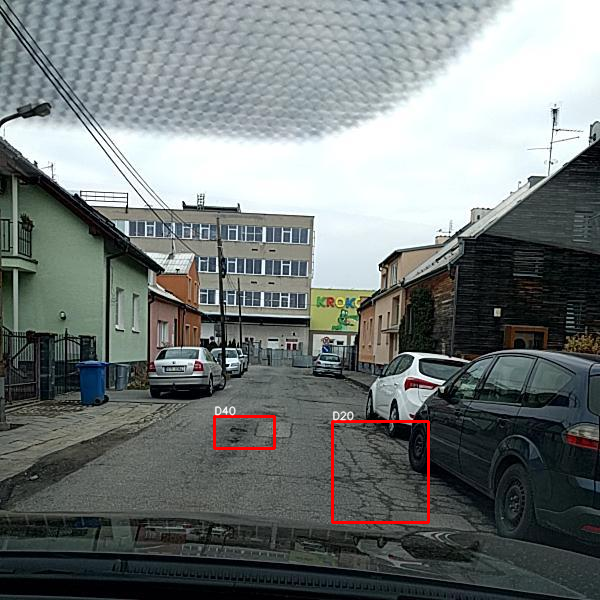

In [81]:
visualize_yolo(image, bboxes, category_ids, category_id_to_name, format='yolo')

In [82]:
transform = A.Compose(
    [A.HorizontalFlip(p=0.5)],
    bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']),
)

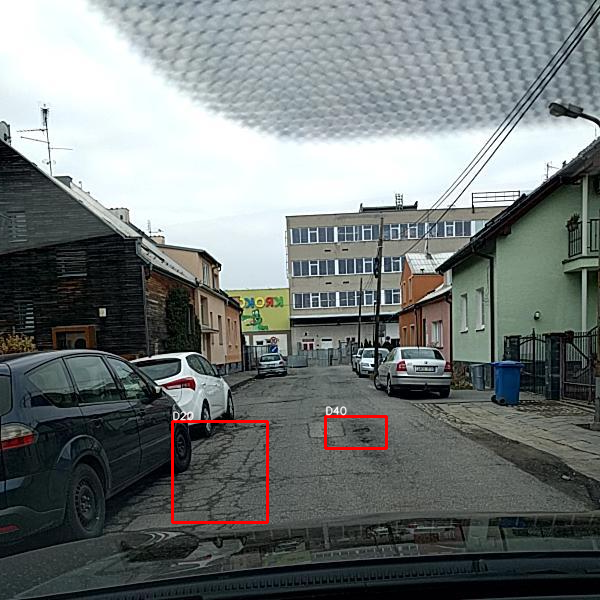

In [83]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize_yolo(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

In [84]:
transform = A.Compose(
    [A.ShiftScaleRotate(p=0.5)],
    bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']),
)

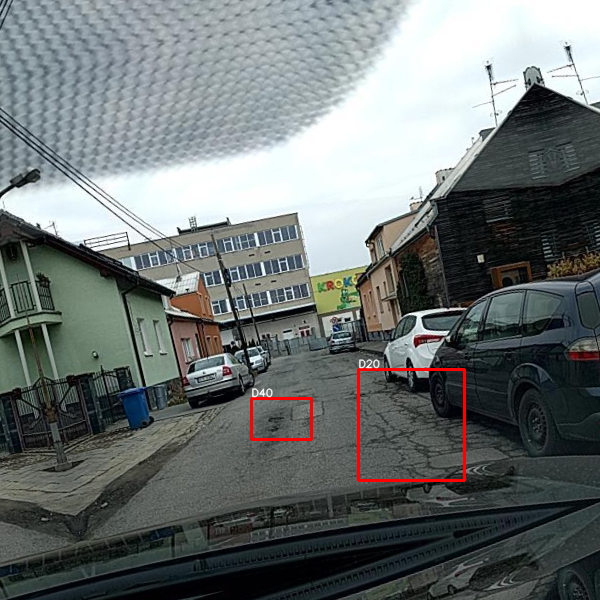

In [85]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize_yolo(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

Complex

In [86]:
transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.OneOf([
          A.MultiplicativeNoise(multiplier=1.5, p=0.6),
          A.GaussNoise(p=0.5),         
        ], p=0.5),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.5),
        A.Rotate(limit=[-30,30], p=0.9),
        A.OneOf([
            A.PiecewiseAffine(p=0.7),
        ], p=0.5),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.Sharpen(),
            A.Emboss(),
            A.RandomBrightnessContrast(),            
        ], p=0.7),
        A.HueSaturationValue(p=0.4),
    ],
    bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']),
)

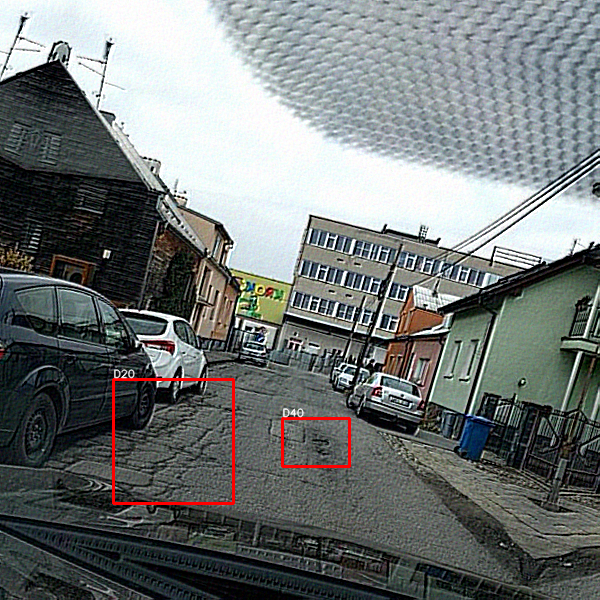

In [87]:
random.seed(4)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize_yolo(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

In [90]:
!mkdir -p aug_data/images/train
!mkdir -p aug_data/images/valid
!mkdir -p aug_data/labels/train
!mkdir -p aug_data/labels/valid

In [91]:
import os

def save_image(image, filename, filepath, preset = 'preset_1'):
    cv2.imwrite(f"{filepath}/{preset}_{filename}_augmented.jpg", image)

def save__yolo_bbox(bboxes, filename, filepath, category_ids, preset = 'preset_1'):
    #cv2.imwrite(f"{filepath}/{preset}_{filename}_augmented.jpg", image)
    with open(f"{filepath}/{preset}_{filename}_augmented.txt", 'w') as f:
      for line, cat in zip(bboxes, category_ids):
        f.write(str(cat) + ' ')
        f.write(str(line[0]) + ' ')
        f.write(str(line[1]) + ' ')
        f.write(str(line[2]) + ' ')
        f.write(str(line[3]) + ' ')
        f.write('\n')

In [92]:
import glob

def augment_images_and_bounding_boxes (labels_path, images_path, out_images_path, out_labels_path, preset='preset_1'):
  for image_path in glob.glob(images_path + '/*.jpg'):
    basename = os.path.basename(image_path)
    basename_no_ext = os.path.splitext(basename)[0]

    bboxes, category_ids = get_bounding_boxes(labels_path +'/' + basename_no_ext + '.txt')

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    try:
      transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)

      save_image(transformed['image'], basename_no_ext, out_images_path, preset)

      save__yolo_bbox(transformed['bboxes'], basename_no_ext, out_labels_path, category_ids, preset)
    except: 
      print('Fail ' + image_path)


In [93]:
augment_images_and_bounding_boxes('content/data/labels/valid','content/data/images/valid', 'aug_data/images/valid', 'aug_data/labels/valid')

Fail content/data/images/valid/Japan_000375.jpg
Fail content/data/images/valid/Japan_010217.jpg
Fail content/data/images/valid/Czech_002830.jpg
Fail content/data/images/valid/India_005123.jpg
Fail content/data/images/valid/Japan_003238.jpg
Fail content/data/images/valid/Japan_011979.jpg


In [94]:
augment_images_and_bounding_boxes('content/data/labels/train','content/data/images/train', 'aug_data/images/train', 'aug_data/labels/train')

Fail content/data/images/train/Czech_000997.jpg
Fail content/data/images/train/Japan_010631.jpg
Fail content/data/images/train/Japan_011217.jpg
Fail content/data/images/train/Japan_011029.jpg
Fail content/data/images/train/Japan_006792.jpg
Fail content/data/images/train/Japan_000275.jpg
Fail content/data/images/train/Japan_004342.jpg
Fail content/data/images/train/Japan_007628.jpg
Fail content/data/images/train/Japan_002087.jpg
Fail content/data/images/train/Japan_012185.jpg
Fail content/data/images/train/Japan_001265.jpg
Fail content/data/images/train/Japan_003421.jpg
Fail content/data/images/train/Japan_012313.jpg
Fail content/data/images/train/India_009013.jpg
Fail content/data/images/train/Japan_007834.jpg


In [95]:
!ls -lh aug_data/images/train | wc -l
!ls -lh aug_data/labels/train | wc -l

9742
9742


In [96]:
!ls -lh aug_data/images/valid | wc -l
!ls -lh aug_data/labels/valid | wc -l

2434
2434


Preset 2

In [97]:
transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.OneOf([
          A.MultiplicativeNoise(multiplier=1.5, p=0.6),        
        ], p=0.5),
        A.OneOf([
            A.RandomRain(p=.4),
            A.MedianBlur(blur_limit=3, p=0.4),
            A.RandomBrightness( p=0.4),
        ], p=0.5),
        A.Rotate(limit=[-30,30], p=0.5),
        A.OneOf([
            A.ToGray(),
            A.Sharpen(),
            A.ToSepia(),
            A.RandomBrightnessContrast(),            
        ], p=0.7),
        A.HueSaturationValue(p=0.4),
    ],
    bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']),
)

/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:1802: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  FutureWarning,


In [98]:
image = cv2.imread('content/data/images/valid/India_004658.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [99]:
bboxes, category_ids = get_bounding_boxes('/content/content/data/labels/valid/India_004658.txt')
category_id_to_name = {0: 'D00', 1: 'D10', 2: 'D20', 3: 'D40'}

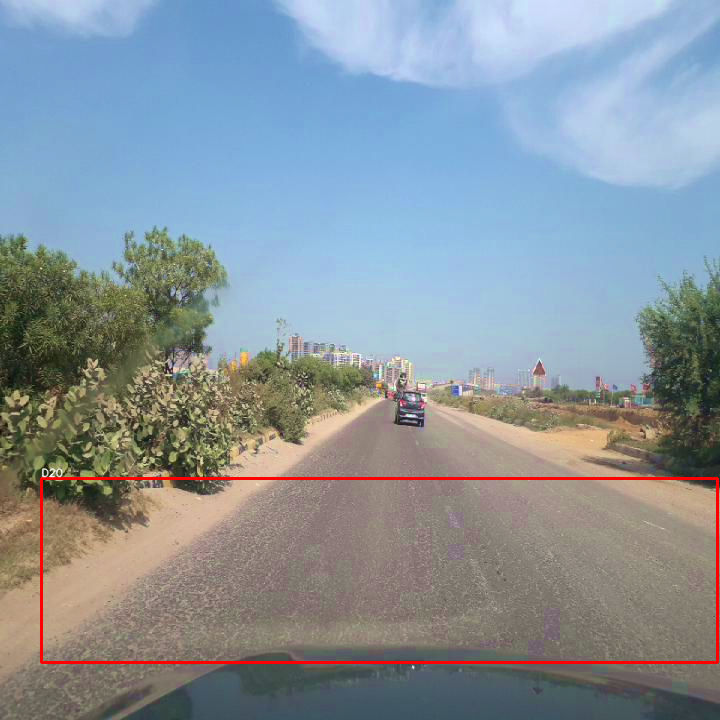

In [100]:
random.seed(5)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize_yolo(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

In [101]:
augment_images_and_bounding_boxes('content/data/labels/train','content/data/images/train', 'aug_data/images/train', 'aug_data/labels/train', 'preset_2')

Fail content/data/images/train/Czech_000997.jpg
Fail content/data/images/train/Japan_010631.jpg
Fail content/data/images/train/Japan_011217.jpg
Fail content/data/images/train/Japan_011029.jpg
Fail content/data/images/train/Japan_006792.jpg
Fail content/data/images/train/Japan_000275.jpg
Fail content/data/images/train/Japan_004342.jpg
Fail content/data/images/train/Japan_007628.jpg
Fail content/data/images/train/Japan_002087.jpg
Fail content/data/images/train/Japan_012185.jpg
Fail content/data/images/train/Japan_001265.jpg
Fail content/data/images/train/Japan_003421.jpg
Fail content/data/images/train/Japan_012313.jpg
Fail content/data/images/train/India_009013.jpg
Fail content/data/images/train/Japan_007834.jpg


In [102]:
!ls -lh aug_data/images/train | wc -l

19483


In [103]:
augment_images_and_bounding_boxes('content/data/labels/valid','content/data/images/valid', 'aug_data/images/valid', 'aug_data/labels/valid', 'preset_2')

Fail content/data/images/valid/Japan_000375.jpg
Fail content/data/images/valid/Japan_010217.jpg
Fail content/data/images/valid/Czech_002830.jpg
Fail content/data/images/valid/India_005123.jpg
Fail content/data/images/valid/Japan_003238.jpg
Fail content/data/images/valid/Japan_011979.jpg


In [104]:
!ls -lh aug_data/images/train | wc -l
!ls -lh aug_data/labels/train | wc -l

19483
19483


In [105]:
!ls -lh aug_data/images/valid | wc -l
!ls -lh aug_data/labels/valid | wc -l

4867
4867


Preset 3

In [41]:
transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.OneOf([
          A.RandomCropNearBBox(p=0.5),        
        ], p=0.5),
        A.OneOf([
            A.RandomFog(p=.4),
            A.MedianBlur(blur_limit=3, p=0.4),
            A.RandomSunFlare( p=0.4),
        ], p=0.5),
        A.Rotate(limit=[-30,30], p=0.5),
        A.OneOf([
            A.ToGray(),
            A.InvertImg(),
            A.ToSepia(),
            A.RandomScale(),            
        ], p=0.7),
        A.MotionBlur(p=0.4),
    ],
    bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']),
)

In [42]:
#augment_images_and_bounding_boxes('content/data/labels/train','content/data/images/train', 'aug_data/images/train', 'aug_data/labels/train', 'preset_3')

Streaming output truncated to the last 5000 lines.
Fail content/data/images/train/Japan_008176.jpg
Fail content/data/images/train/Japan_000673.jpg
Fail content/data/images/train/Czech_001377.jpg
Fail content/data/images/train/Japan_012365.jpg
Fail content/data/images/train/Japan_009307.jpg
Fail content/data/images/train/Japan_009488.jpg
Fail content/data/images/train/Japan_000534.jpg
Fail content/data/images/train/Japan_012008.jpg
Fail content/data/images/train/India_008375.jpg
Fail content/data/images/train/Japan_001972.jpg
Fail content/data/images/train/India_005218.jpg
Fail content/data/images/train/India_007308.jpg
Fail content/data/images/train/India_001165.jpg
Fail content/data/images/train/Japan_011810.jpg
Fail content/data/images/train/Czech_001258.jpg
Fail content/data/images/train/Japan_004626.jpg
Fail content/data/images/train/Japan_012725.jpg
Fail content/data/images/train/India_003490.jpg
Fail content/data/images/train/India_004327.jpg
Fail content/data/images/train/India_

In [43]:
#augment_images_and_bounding_boxes('content/data/labels/valid','content/data/images/valid', 'aug_data/images/valid', 'aug_data/labels/valid', 'preset_3')

Fail content/data/images/valid/Japan_009127.jpg
Fail content/data/images/valid/Japan_006935.jpg
Fail content/data/images/valid/Japan_008313.jpg
Fail content/data/images/valid/India_005005.jpg
Fail content/data/images/valid/India_008989.jpg
Fail content/data/images/valid/Czech_003024.jpg
Fail content/data/images/valid/Japan_010060.jpg
Fail content/data/images/valid/Japan_007373.jpg
Fail content/data/images/valid/India_004686.jpg
Fail content/data/images/valid/Japan_006282.jpg
Fail content/data/images/valid/Japan_009810.jpg
Fail content/data/images/valid/Japan_000703.jpg
Fail content/data/images/valid/India_004071.jpg
Fail content/data/images/valid/Japan_000164.jpg
Fail content/data/images/valid/Japan_006267.jpg
Fail content/data/images/valid/India_000317.jpg
Fail content/data/images/valid/Japan_008736.jpg
Fail content/data/images/valid/India_001186.jpg
Fail content/data/images/valid/Japan_012148.jpg
Fail content/data/images/valid/Japan_011957.jpg
Fail content/data/images/valid/Japan_002

In [44]:
!ls -lh aug_data/images/train | wc -l
!ls -lh aug_data/labels/train | wc -l

11601
11601


In [45]:
!ls -lh aug_data/images/valid | wc -l
!ls -lh aug_data/labels/valid | wc -l

2889
2889


In [46]:
!cp -r /content/content/data/data.yaml /content/aug_data

In [47]:
!cp -r /content/content/data/obj.data /content/aug_data

In [48]:
!cp -r /content/content/data/obj.names /content/aug_data

In [ ]:
!ls -lh aug_data/images/valid | wc -l
!ls -lh aug_data/labels/valid | wc -l

In [106]:
%cd aug_data

/content/aug_data


In [107]:
import glob

image_list = []
for filename in glob.glob('images/train' + '/*.jpg'):
  image_list.append('images/train' + filename)

In [108]:
with open('train.txt', 'w') as f:
    for item in image_list:
        f.write("%s\n" % item)

In [109]:
image_list = []
for filename in glob.glob('images/valid' + '/*.jpg'):
  image_list.append('images/valid' + filename)

In [110]:
with open('valid.txt', 'w') as f:
    for item in image_list:
        f.write("%s\n" % item)

In [98]:
!ls -lh /content/aug_data/labels/train | wc -l

4675


In [99]:
!ls -lh /content/aug_data/labels/valid | wc -l

1139


In [111]:
%cd ..

/content


In [55]:
import tarfile

def make_tarfile(output_filename, source_dir):
  '''
  This function is used to create tar.gz file for a given folder.
  Input : output file name (string) and source directory (string)
  '''
  # Reference : https://stackoverflow.com/questions/2032403/how-to-create-full-compressed-tar-file-using-python
  with tarfile.open(output_filename, "w:gz") as tar:
    tar.add(source_dir)

In [112]:
# function calling for creating tar.gz file
make_tarfile('RDD2020_yolo_aug_datav2.tar.gz', 'aug_data')

In [113]:
%cp -r RDD2020_yolo_aug_datav2.tar.gz /content/drive/MyDrive/College/Thesis/RDD/

In [58]:
image = cv2.imread('content/data/images/valid/Czech_000086.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [69]:
bboxes, category_ids = get_bounding_boxes('/content/content/data/labels/valid/Czech_000086.txt')
category_id_to_name = {0: 'D00', 1: 'D10', 2: 'D20', 3: 'D40'}

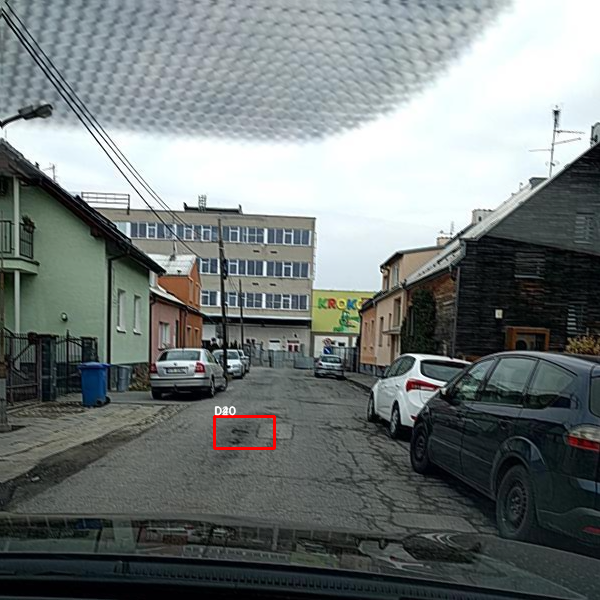

In [70]:
random.seed(5)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize_yolo(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

In [67]:
print(bboxes)

[[0.4066666666666667, 0.7200000000000001, 0.1, 0.05333333333333334, 0.6341666666666667, 0.7858333333333334, 0.15833333333333335, 0.16833333333333333]]
